In [ ]:
import tensorflow as tf # Import tensorflow library for deep learning
import matplotlib.pyplot as plt # Import Matplotlib for plotting results
import numpy as np # Import Numoy for numerical opeations

from tensorflow.keras import layers, models # Import layers and model utilites
from tensorflow.keras.models import load_model # Import function to load saved model
from tensorflow.keras.preprocessing import image # Import utilities for image preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Import confusion matrix functions


In [3]:
# Load training dataset from diractory with 80% split
train_data = tf.keras.utils.image_dataset_from_directory(
    "data_sets",            # Path to the dataset folder
    validation_split = 0.2, # Reserve 20% of data for validation
    subset = "training",    # spectify training subset
    seed = 123,             # Random seed for reproductibility
    image_size = (28, 28),  # Resize all images to 28*28
    color_mode= "grayscale", # Use grayscale since digits are black & white
    batch_size = 64         # Number of images processed per batch
)

Found 80000 files belonging to 1 classes.
Using 64000 files for training.


In [4]:
# Load validation dataset from directory with 20% split
val_data = tf.keras.utils.image_dataset_from_directory(
    "data_sets",            # Path to the data folder
    validation_split= 0.2,  # Same 20% reserved for validation
    subset = "validation",  # Specify validation subset
    seed = 123,             # Randome seed for reproducibility
    image_size = (28, 28),  # Resize images to 28*28
    color_mode = "grayscale", # Grayscale images
    batch_size = 64         # Number of image per bath
)

Found 80000 files belonging to 1 classes.
Using 16000 files for validation.


In [5]:
# Normalize pixel values from [0,255] to [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y)) # Aplly normalization to training set
val_data = val_data.map(lambda x, y: (normalization_layer(x), y)) # Aplly normalization to validation set

In [6]:
# Define a Convolutional Neural Network (CNN) model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)), # First convolutional layer with 32 filters
    layers.MaxPool2D(2, 2), # Downsample feature maps by 2x2

    layers.Conv2D(64, (3, 3), activation = 'relu'), # Second convolutional layer with 64 filters
    layers.MaxPool2D(2, 2), # Downsample again

    layers.Flatten(),           # Flatten 2D Feature maps into 1D vector
    layers.Dense(128, activation = 'relu'), # Fully connected layer with 128 nourins
    layers.Dropout(0.5),        # Dropout 50% to prevent overfitting
    layers.Dense(20, activation = 'softmax') # Output layer with 20 classes (digits 0-9 + persian 0-9)
])

In [7]:
# Compile the model with optimizer, loss function, and metrics
model.compile(
        optimizer = 'adam',               # Adam optimizer for adaptive learning
        loss = 'sparse_categorical_crossentropy',    # Loss for multi-class classification with labels
        metrics = ['accuracy'])          # Track accuracy during training

In [ ]:
# Train the model on training data and validate on validation data
model.fit(train_data, validation_data = val_data, epochs=15) # Train for 15 epochs

Epoch 1/15
1000/1000 [==============================] - 230s 227ms/step - loss: 0.0228 - accuracy: 0.9991 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/15
1000/1000 [==============================] - 31s 31ms/step - loss: 3.2406e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/15
1000/1000 [==============================] - 31s 31ms/step - loss: 2.6445e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/15
1000/1000 [==============================] - 32s 31ms/step - loss: 1.4504e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/15
1000/1000 [==============================] - 31s 31ms/step - loss: 1.7409e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/15
1000/1000 [==============================] - 31s 31ms/step - loss: 9.3472e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/15
1000/1000 [==============================] - 31s 31ms/step - loss: 

In [ ]:
# Save the trained model to a file
model.save("persian_digits_model.h5") # Save model in HDF5 format

g:\miniconda\envs\myenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
# load the saved model
model = load_model('persian_digits_model.h5')
model.summary() # Show model architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [9]:
# Evaluate the model on validation data
loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc:.2f}") # Print validation accuracy

250/250 [==============================] - 21s 78ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Validation Accuracy: 1.00


In [10]:
# Get true labels and preditions
y_true = np.concatenate([y for x, y in val_data], axis= 0)
y_pred = np.argmax(model.predict(val_data), axis=1)

250/250 [==============================] - 4s 15ms/step


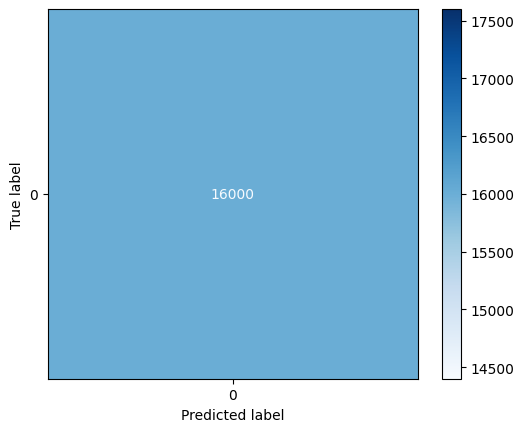

In [11]:
# Get true labels and predictions
cm = confusion_matrix(y_true, y_pred)
dsip = ConfusionMatrixDisplay(confusion_matrix= cm)
dsip.plot(cmap =plt.cm.Blues, values_format='d')
plt.show()